/home/vimal/Udacity
350


/home/vimal/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vimal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


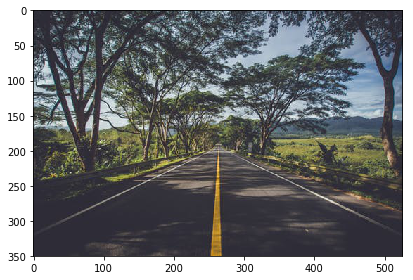

In [10]:
import matplotlib.pyplot as plt
from skimage import io,color
import os

import numpy as np
print(os.getcwd())
img = io.imread('test.jpg')
ysize = img.shape[0]
xsize = img.shape[1]
a = np.array(img)
io.imshow(img)
b= a[:,:,0]>254
b.shape
print(ysize)

(350, 526)


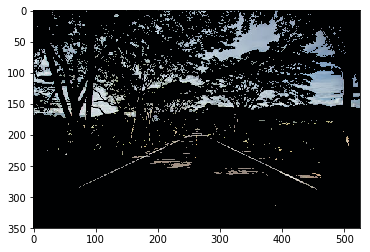

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 120
green_threshold = 120
blue_threshold = 120
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1])\
| (image[:,:,2] < rgb_threshold[2])
print(thresholds.shape)
color_select[thresholds] = [0,1,2]
#print(color_select[:,:,0][100])
# Display the image                 
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.png", color_select)


In [90]:
a = np.arange(81).reshape(3,9,3)
thresholds = (a[:,:,0] < 7) 

a[thresholds] =[0,0,0]
print(thresholds)
print(a)

[[ True  True  True False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 9 10 11]
  [12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]
  [36 37 38]
  [39 40 41]
  [42 43 44]
  [45 46 47]
  [48 49 50]
  [51 52 53]]

 [[54 55 56]
  [57 58 59]
  [60 61 62]
  [63 64 65]
  [66 67 68]
  [69 70 71]
  [72 73 74]
  [75 76 77]
  [78 79 80]]]


In [6]:
left_bottom = [0, 300]
right_bottom = [526, 300]
apex = [260, 180]

In [21]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
print(fit_left,fit_right,fit_bottom)
XX, YY = np.meshgrid(np.arange(0, 5), np.arange(0, 7))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
print(YY >XX*fit_left[0] + fit_left[1])

[ -0.46153846 300.        ] [ 0.45112782 62.70676692] [  0. 300.]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [9]:
XX, YY = np.meshgrid(np.arange(1, 6), np.arange(1, 3))
print(XX,YY)

[[1 2 3 4 5]
 [1 2 3 4 5]] [[1 1 1 1 1]
 [2 2 2 2 2]]


(350, 526)
(350, 526)


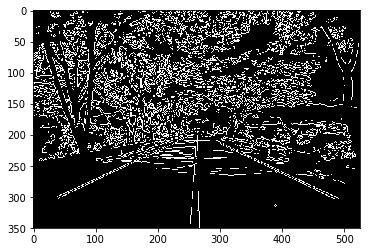

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image
image = mpimg.imread('test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# NOTE: if you try running this code you might want to change these!
low_threshold = 100
high_threshold =250
edges = cv2.Canny(gray, low_threshold, high_threshold,L2gradient = True)
print(edges.shape)
# Display the image


print(edges.shape)
# Display the image
plt.imshow(edges,cmap='Greys_r')

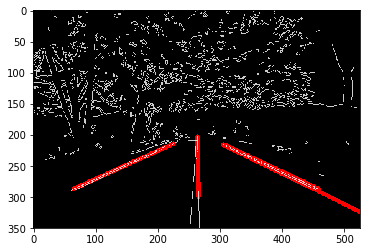

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('test.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
#kernel_size = 5
#blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 300
high_threshold = 550
edges = cv2.Canny(gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   
left_bottom = [0, 300]
right_bottom = [526, 300]
apex = [260, 180]
# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(left_bottom),(right_bottom),(apex)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 25 #minimum number of pixels making up a line
max_line_gap = 20   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines[:5]:
    for x1,y1,x2,y2 in line:
        if y2<imshape[0]:
            m=(y2-y1)/(x2-x1)
            c=y1-(m*x1)
            x_temp=(imshape[0]-c)/m
            if int(x_temp)-x_temp==0:
                cv2.line(line_image,(x1,y1),(int(x_temp),imshape[0]),(255,0,0),5)
            else:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        else:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)




In [28]:
import cv2 as cv
# Load two images
img1 = cv.imread('test.jpg')
img2 = cv.imread('highway.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(img2.shape)
roi = img1[0:rows, 0:cols ]
#cv.imshow('res',roi)
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray,180, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = img2[:,:]
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

(180, 248, 3)


In [34]:
import numpy as np
a = np.array([[1,2,3,4,5,6,7],[8,3,4,8,5,6,7,8]])
b = a[0:1]
b

array([list([1, 2, 3, 4, 5, 6, 7])], dtype=object)

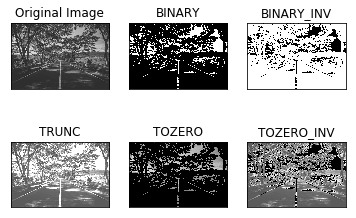

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('test.jpg',0)
blur = cv.GaussianBlur(img,(5,5),0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show() 
cv.imshow('im',blur)
cv.waitKey(0)
cv.destroyAllWindows()